# Phân loại bệnh đái tháo đường ở Ấn Độ

## 1. Định nghĩa vấn đề (Define Problem)
+ **Mô tả**:
    + Bộ dữ liệu bao gồm 768 mẫu thuộc 1 trong 2 nhóm phân loại là đái tháo đường và không đái tháo đường
    + Tám đặc điểm được đo từ mỗi mẫu: Số lần mang thai, Nồng độ glucose trong huyết tương, áp lực trong động mạch, độ dày lớp mỡ, yếu tố di truyền, nồng độ insulin, chỉ số khối cơ thể, độ tuổi
+ **Dữ liệu vào**:
    + number of times pregnant: Số lần mang thai
    + GTT: Nồng độ glucose trong huyết tương sau 2 giờ
    + Diastolic Blood Pressure (mm Hg): Áp lực máu trong động mạch khi tìm nghỉ giữa các nhịp đập
    + Triceps Skin Fold Thickness (mm): Độ dày lớp mỡ dưới da ở vùng cơ tam đầu (mm).
    + 2-Hour Serum Insulin (µU/ml): Nồng độ insulin huyết thanh sau 2 giờ
    + Body Mass Index (BMI = Weight in kg / (Height in m)^2 ): Chỉ số khối cơ thể, cho biết tình trạng cơ thể
    + Diabetes Pedigree Function: Yếu tố di truyền
    + Age (years): Tuổi
+ **Kết quả**: class (Có, Không)

## 2. Chuẩn bị vấn đề (Prepare Problem)

### 2.1. Khai báo thư viện (Load Libraries)

In [ ]:
# Load libraries
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings

%matplotlib inline
# plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings("ignore")

### 2.2. Nạp dữ liệu (Load Dataset)

In [ ]:
# Load dataset
data_path  = "pima-indians-diabetes.csv"
data_names = ["times_regnanr", "GTT", "pressure", "skinThinkness", "isulin", "bmi", "diabets" , "age", "class"]
df_dataset = pd.read_csv(data_path, names = data_names)

## 3. Phân tích dữ liệu (Analyze Data)

### 3.1. Thống kê mô tả (Descriptive Statistics)

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [ ]:
# shape
print(f'+ Shape: {df_dataset.shape}')
# types
print(f'+ Data Types: \n{df_dataset.dtypes}')
# head, tail
print(f'+ Contents: ')
display.display(df_dataset.head(5))
display.display(df_dataset.tail(5))
# info
df_dataset.info()

+ Shape: (768, 9)
+ Data Types: 
times_regnanr      int64
GTT                int64
pressure           int64
skinThinkness      int64
isulin             int64
bmi              float64
diabets          float64
age                int64
class              int64
dtype: object
+ Contents: 


,times_regnanr,GTT,pressure,skinThinkness,isulin,bmi,diabets,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,times_regnanr,GTT,pressure,skinThinkness,isulin,bmi,diabets,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   times_regnanr  768 non-null    int64  
 1   GTT            768 non-null    int64  
 2   pressure       768 non-null    int64  
 3   skinThinkness  768 non-null    int64  
 4   isulin         768 non-null    int64  
 5   bmi            768 non-null    float64
 6   diabets        768 non-null    float64
 7   age            768 non-null    int64  
 8   class          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Nhận xét**:
+ Dữ liệu có 2 tính chất để phân lớp: 0 (Không bị đái tháo đường), 1 (Bị đái tháo đường)
+ Giá trị tính chất được tính theo các đơn vị đo như sau:
  + Thời gian mang thai (lần)
  + GTT
  + Huyết áp (mmHg)
  + Độ dày lớp mỡ dưới da (mm)
  + Lượng isulin có trong máu $(\mu U/\text{ml})$
  + Số lượng BMI (Cân nặng (kg) + Chiều cao (m))
  + Phả hệ
  + Độ tuổi
+ Tổng số dòng dữ liệu là 767 dòng
+ Dữ liệu để phân lớp ở cột class: 0 (Không bị đái tháo đường), 1 (Bị đái tháo đường)

#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [ ]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
n_duplicated = df_dataset.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 0


**Nhận xét**:
+ Dữ liệu không có dòng bị trùng
+ Dữ liệu không có giá trị rỗng (NaN, Null)

#### (3) **Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [ ]:
description = df_dataset.describe().T
display.display(description)

,count,mean,std,min,25%,50%,75%,max
times_regnanr,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
GTT,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skinThinkness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
isulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
diabets,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Nhận xét**:
+ Thơi gian mang thai nằm trong khoảng [0, 17] lần
+ GTT nằm trong khoảng [0, 199]
+ Huyết áp nằm trong khoảng [0, 122]
+ Diện tích lớp mỡ dưới da nằm trong khoảng [0, 99] mm
+ Nồng độ isulin nằm trong khoảng [0, 846] $(\mu U/\text{ml})$
+ BMI nằm trong khoảng [0, 67.1]
+ Đái tháo đường nằm trong khoảng [0.078, 2.42]
+ Độ tuổi nằm trong khoảng [21, 81]
+ Lớp phân loại nằm trong khoảng [0, 1]


#### (4) **Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)**

Đối với bài toán phân lớp (classification problem), chúng ta cần tính số lần xuất hiện của thuộc tính phân lớp. Điều này là cần thiết cho vấn đề mất cân bằng (highly imbalanced problems) giữa các lớp nhằm cần xử lý đặc biệt trong bước chuẩn bị dữ liệu.

In [ ]:
df_dataset["class"].value_counts()

,count
class,
0,500
1,268


**Nhận xét**:
+ Dữ liệu có 2 phân loại
+ Các lớp là không cân bằng nhau và có số lượng khác nhau
  + 0 (Không bị đái tháo đường): 500 mẫu
  + 1 (Bị đái tháo đường): 268 mẫu

#### (5) **Mối tương quan giữa các tính chất (Correlations)**

Sự tương quan (correlation) đề cập đến mối quan hệ giữa hai biến và cách chúng có thể có hoặc không cùng nhau thay đổi.

Phương pháp phổ biến nhất để tính toán tương quan là Pearson's Correlation Coeficient, giả định có một phân phối chuẩn của các thuộc tính liên quan. Tương quan -1 hoặc 1 cho thấy mối tương quan âm hoặc dương đầy đủ tương ứng. Trong khi giá trị 0 hiển thị không tương quan ở tất cả.

$$
r = \frac{\sum_{i=1}^n{\left(x_i - \hat{x}\right)\left(y_i - \hat{y}\right)}}{\sqrt{\sum_{i=1}^n{\left(x_i - \hat{x}\right)^2}\sum_{i=1}^n{\left(y_i - \hat{y}\right)^2}}}
$$

Một số thuật toán học máy như hồi quy tuyến tính và logistic có hiệu suất kém nếu có các thuộc tính tương quan cao trong tập dữ liệu của bạn.

Như vậy, thật sự cần thiết để xem xét tất cả các mối tương quan theo cặp của các thuộc tính trong tập dữ liệu.

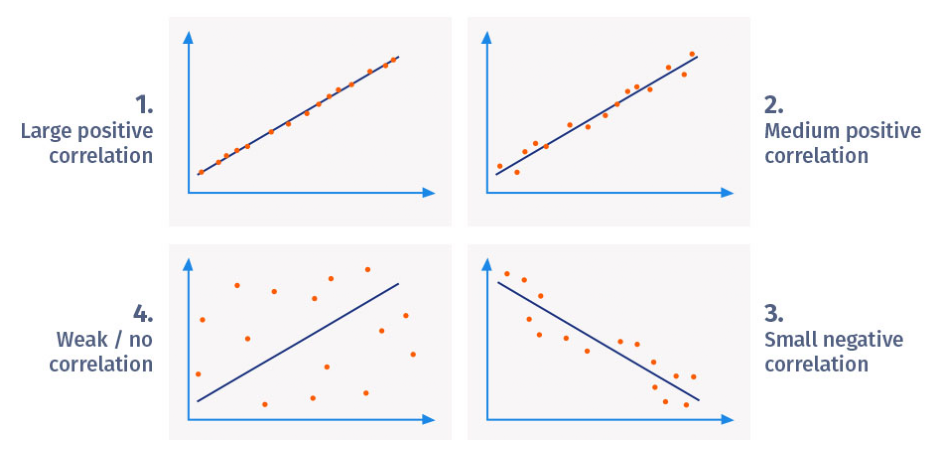

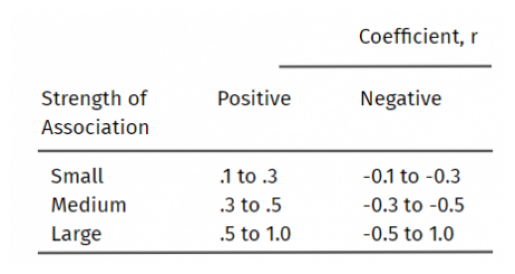

In [ ]:
plt.figure(figsize=(12, 6));
plt.imshow(plt.imread("corr1.png")), plt.axis("off"), plt.show();
plt.imshow(plt.imread("corr2.png")), plt.axis("off"), plt.show();

In [ ]:
correlations = df_dataset.corr(method='pearson')
display.display(correlations)

,times_regnanr,GTT,pressure,skinThinkness,isulin,bmi,diabets,age,class
times_regnanr,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
GTT,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skinThinkness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
isulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabets,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Nhận xét**:
+ Các cặp tính chất có độ tương đồng cao:
    + (time_regnanr, age) = 0.5443
    + (isulin, skinThinkness) = 0.4367

### 3.2. Hiển thị dữ liệu (Visualize Data)

#### (1) Hiển thị trên từng tính chất đơn (Univariate Plots)

**Box and whisker plots**
+ https://www.simplypsychology.org/boxplots.html
+ So sánh các trung vị (median) tương ứng của mỗi ô hộp (box plot). Nếu đường trung vị của một ô hộp nằm bên ngoài ô của một ô hộp so sánh, thì có thể có sự khác biệt giữa hai nhóm.
+ So sánh chiều dài hộp để kiểm tra cách dữ liệu được phân tán giữa mỗi mẫu. Hộp càng dài thì dữ liệu càng phân tán. Dữ liệu càng nhỏ càng ít bị phân tán.
+ Một ngoại lệ (outlier) được định nghĩa là một điểm dữ liệu nằm bên ngoài phần rìa (whiskers) của ô hộp.
+ Kiểm tra hướng lệch của dữ liệu (cân đối, các phần tử tập trung trái, phải).
    + Median ở giữa hộp và râu (whiskers) ở hai bên như nhau thì phân bố là đối xứng.
    + Median ở gần đáy hộp hơn và nếu râu ngắn hơn ở đầu dưới của hộp, thì phân phối là lệch dương (lệch phải).
    + Median ở gần đầu hộp hơn và nếu râu ngắn hơn ở đầu trên của hộp, thì phân bố bị lệch âm (lệch trái).

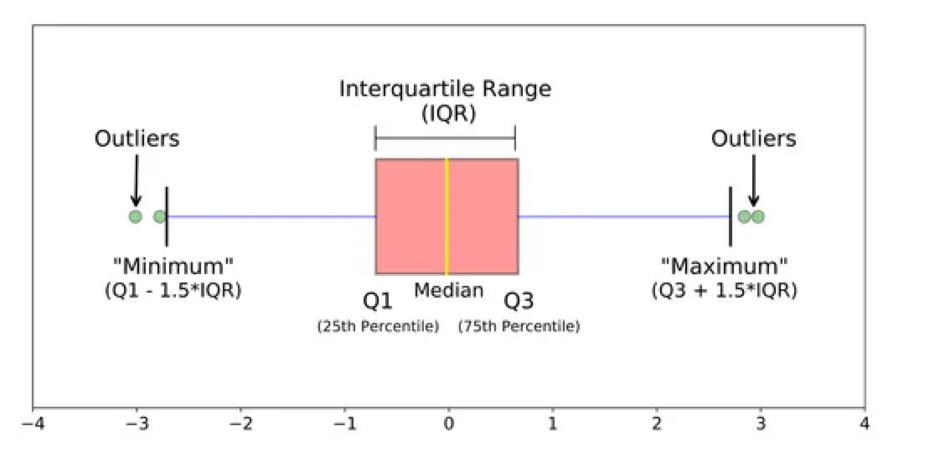

In [ ]:
plt.figure(figsize=(12, 6)), plt.imshow(plt.imread("boxplots.png")), plt.axis("off"), plt.show();

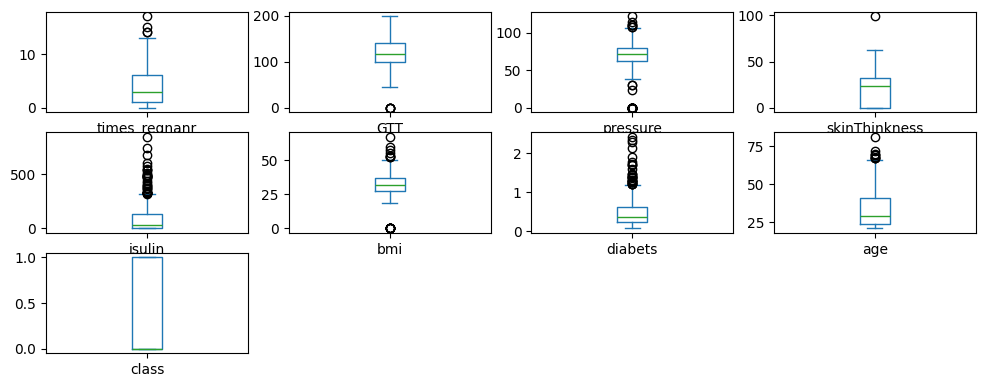

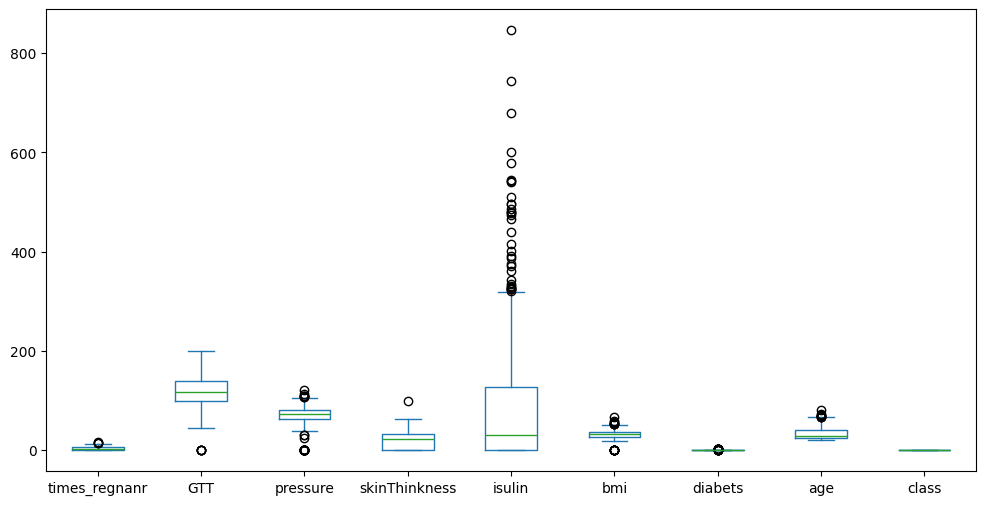

In [ ]:
df_dataset.plot(kind="box", subplots=True, layout=(4, 4), sharex=False, sharey=False, figsize=(12,6));
df_dataset.plot(kind="box", figsize=(12,6));

**Nhận xét**:
+ Độ trải rộng giữa các tính chất khá khác nhau (isulin có phân bố nhiều về dương nhiều nhất)
+ Độ lệch của times_regnanr, pressure, bmi, diabets, age theo hướng giá trị dương.
+ Phân bố giá trị của GTT khá cân bằng

**Biểu đồ Histogram**

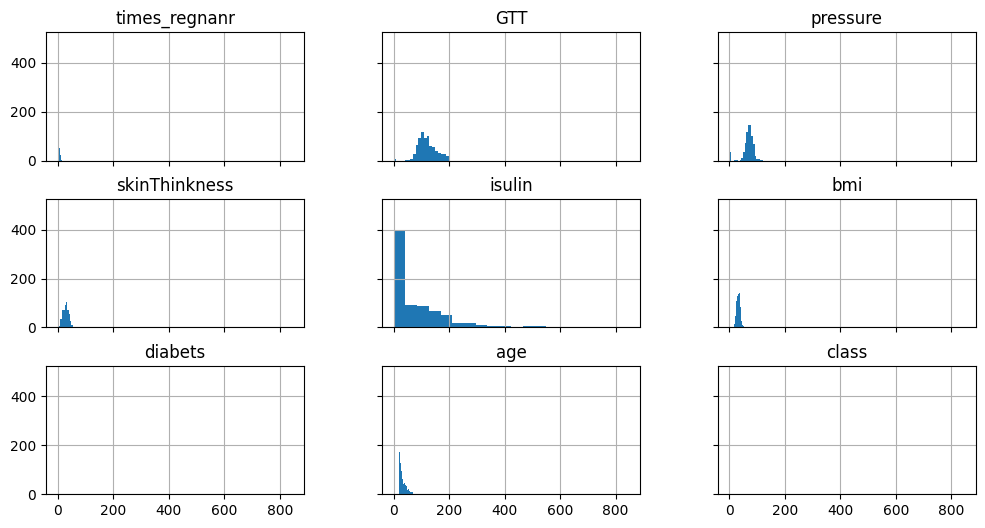

In [ ]:
df_dataset.hist(figsize=(12, 6), bins = 20, sharex = True, sharey = True);

#### (2) Hiển thị nhiều tính chất (Multivariate Plots)

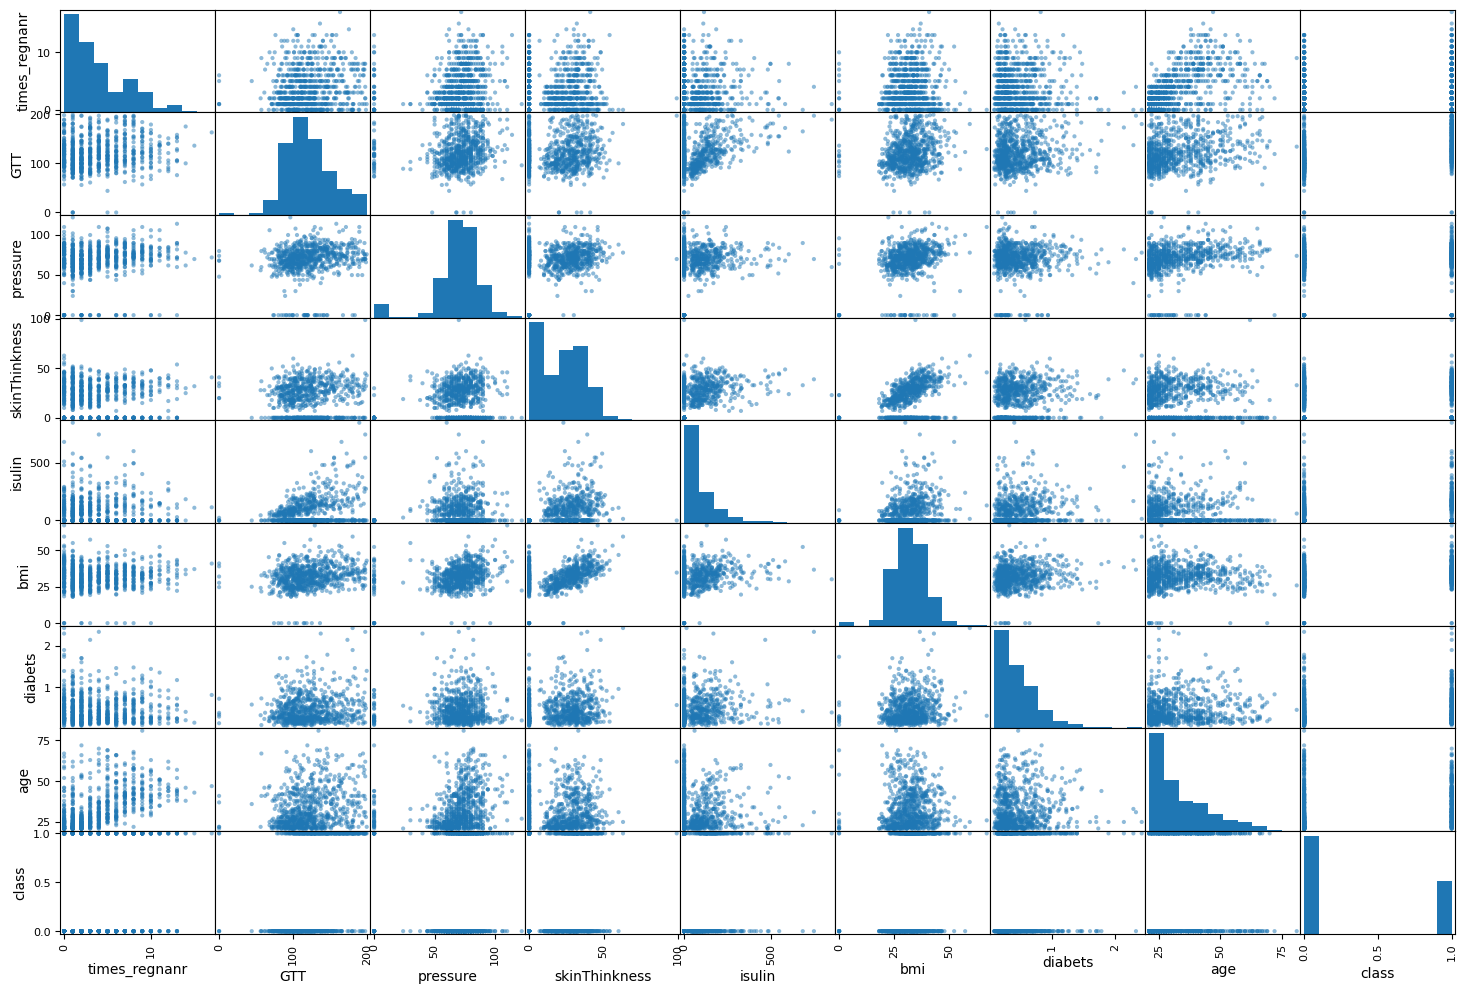

In [ ]:
pd.plotting.scatter_matrix(df_dataset, figsize=(18,12));

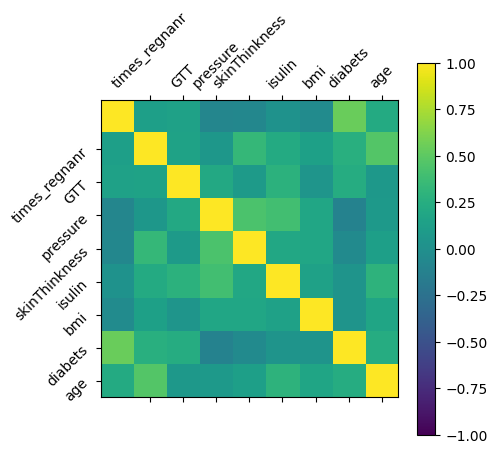

In [ ]:
plt.matshow(correlations,vmin = -1, vmax = 1), plt.colorbar()
plt.xticks(np.arange(1,9), rotation = 45);
plt.yticks(np.arange(1,9), rotation = 45);
plt.gca().set_xticklabels(list(df_dataset.columns[:-1]));
plt.gca().set_yticklabels(list(df_dataset.columns[:-1]));

## 4. Chuẩn bị dữ liệu (Prepare Data)

### 4.1. Làm sạch dữ liệu (Data Cleaning)

#### (1) **Tạo bảng dữ liệu làm sạch**
+ Chỉ giữ lại các cột Input, Ouput

In [ ]:
df_clean = df_dataset.copy()

#### (2) **Xử lý giá trị rỗng, không hợp lệ**

In [ ]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])

+ Có giá trị Null: False
+ Có giá trị Nan: False


##### Example
Nếu có dữ liệu Null, hay Nan thì chúng ta có các cách giải quyết sau:
+ Chúng ta xóa bỏ cột tính chất vi phạm:

```python
df_clean.drop("cột_vi_phạm", axis=1)
```
+ Chúng ta xóa bỏ các dòng vi phạm:

```python
df_clean.dropna(subset=["cột_vi_phạm", ...])
```

+ Điền giá trị hằng số (như số 0), hoặc nội suy bằng phần tử median:

```python
median = df_clean["cột_vi_phạm"].median()
df_clean["cột_vi_phạm"].fillna(median, inplace=True)
```

In [ ]:
# Example:
df_example = pd.read_csv("Data.csv")
df_example

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
# Chúng ta xóa bỏ cột tính chất vi phạm
df_example.drop("Salary", axis = 1)

,Country,Age,Purchased
0,France,44.0,No
1,Spain,27.0,Yes
2,Germany,30.0,No
3,Spain,38.0,No
4,Germany,40.0,Yes
5,France,35.0,Yes
6,Spain,NaN,No
7,France,48.0,Yes
8,Germany,50.0,No
9,France,37.0,Yes


In [ ]:
# Chúng ta xóa bỏ các dòng vi phạm
df_example.dropna(subset=["Salary", "Age"])

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
# Điền giá trị hằng số (cho cột Age) hoặc median (cho cột Salary)
df_example["Age"].fillna(0, inplace=True)
median = df_example["Salary"].median()
df_example["Salary"].fillna(median, inplace=True)
df_example

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,61000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,0.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


### 4.2. Biến đổi dữ liệu (Data Transforms)

##### Example

In [ ]:
purchased_encoder = LabelEncoder()
purchased_encoder.fit(df_example["Purchased"])
purchased_names = purchased_encoder.classes_
print(purchased_names)
print(purchased_encoder.transform(df_example["Purchased"]))

['No' 'Yes']
[0 1 0 0 1 1 0 1 0 1]


In [ ]:
df_example["Purchased"] = purchased_encoder.transform(df_example["Purchased"])
df_example

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,0
1,Spain,27.0,48000.0,1
2,Germany,30.0,54000.0,0
3,Spain,38.0,61000.0,0
4,Germany,40.0,61000.0,1
5,France,35.0,58000.0,1
6,Spain,0.0,52000.0,0
7,France,48.0,79000.0,1
8,Germany,50.0,83000.0,0
9,France,37.0,67000.0,1


#### (2) Chuyển đổi dữ liệu danh mục (Category) thành dạng OneHot

Một số thuật toán khi chuyển đổi cột dạng danh mục thành kiểu OneHot thì cho hiệu suất cao hơn.

Bên cạnh đó, khi huấn luyện mô hình với dạng hàm mất mát CategoryEntropy thì cũng cần chuyển thuộc tính phân lớp sang dạng OneHot.

##### Example

In [ ]:
# Áp dụng cho cột country
df_contry_onehot = pd.get_dummies(df_example["Country"])
df_contry_onehot

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,False,True,False
3,False,False,True
4,False,True,False
5,True,False,False
6,False,False,True
7,True,False,False
8,False,True,False
9,True,False,False


In [ ]:
df_contry_onehot = pd.DataFrame(df_contry_onehot.values,
                                columns=["Is_France", "Is_Germany", "Is_Spain"])
df_contry_onehot

,Is_France,Is_Germany,Is_Spain
0,True,False,False
1,False,False,True
2,False,True,False
3,False,False,True
4,False,True,False
5,True,False,False
6,False,False,True
7,True,False,False
8,False,True,False
9,True,False,False


In [ ]:
df_example = df_example.drop("Country", axis = 1)
df_example = df_contry_onehot.join(df_example)
df_example

,Is_France,Is_Germany,Is_Spain,Age,Salary,Purchased
0,True,False,False,44.0,72000.0,0
1,False,False,True,27.0,48000.0,1
2,False,True,False,30.0,54000.0,0
3,False,False,True,38.0,61000.0,0
4,False,True,False,40.0,61000.0,1
5,True,False,False,35.0,58000.0,1
6,False,False,True,0.0,52000.0,0
7,True,False,False,48.0,79000.0,1
8,False,True,False,50.0,83000.0,0
9,True,False,False,37.0,67000.0,1


#### (3) Chuẩn hóa dữ liệu (Data Normalize)

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán

In [ ]:
# Min-Max Normalization
scale_columns = ["times_regnanr", "GTT", "pressure", "skinThinkness", "isulin", "bmi", "diabets" , "age"]
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_clean[scale_columns])
df_clean_minmax = df_clean.copy()
df_clean_minmax[scale_columns] = minmax_scaler.transform(df_clean[scale_columns])
df_clean_minmax

,times_regnanr,GTT,pressure,skinThinkness,isulin,bmi,diabets,age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


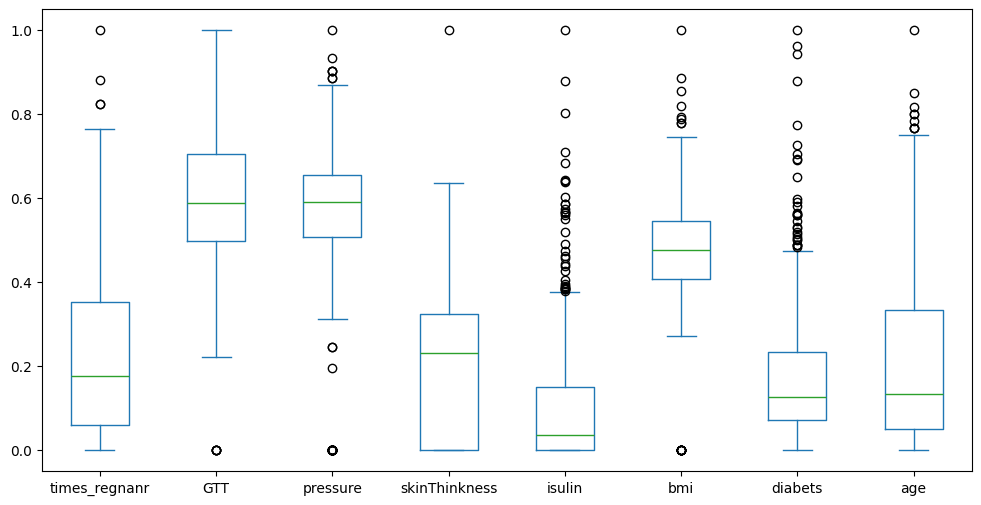

In [ ]:
df_clean_minmax[scale_columns].plot(kind="box", figsize=(12,6));

In [ ]:
# Standard Normalization
standard_scaler = StandardScaler()
standard_scaler.fit(df_clean[scale_columns])
df_clean_standard = df_clean.copy()
df_clean_standard[scale_columns] = standard_scaler.transform(df_clean[scale_columns])
df_clean_standard

,times_regnanr,GTT,pressure,skinThinkness,isulin,bmi,diabets,age,class
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


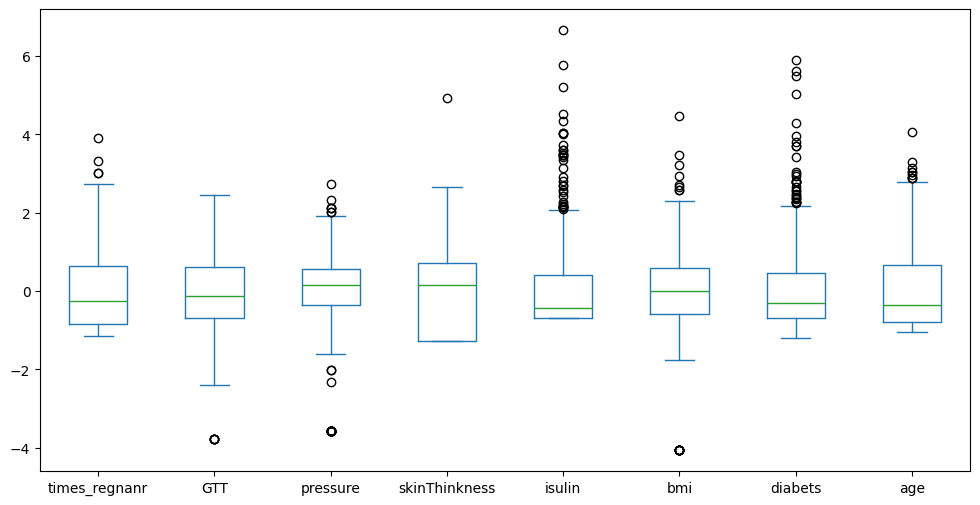

In [ ]:
df_clean_standard[scale_columns].plot(kind="box", figsize=(12,6));

In [ ]:
correlations = df_clean_standard.corr(method='pearson')
display.display(correlations)

,times_regnanr,GTT,pressure,skinThinkness,isulin,bmi,diabets,age,class
times_regnanr,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
GTT,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skinThinkness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
isulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabets,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### (4) Chia dữ liệu thực nghiệm

+ Chuyển đổi dữ liệu sang dạng numpy với phần Input (X_data), Output (y_data)
+ Chia dữ liệu thành tập train/test (tỷ lệ 70/30)
+ Lưu tất cả thông tin để chuẩn bị chạy thuật toán

In [ ]:
X_data, y_data = df_clean.values[:, :-1], df_clean.values[:, -1]
X_data.shape, y_data.shape
print(X_data[:20, :])
print(y_data[:20])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]
 [5.000e+00 1.160e+02 7.400e+01 0.000e+00 0.000e+00 2.560e+01 2.010e-01
  3.000e+01]
 [3.000e+00 7.800e+01 5.000e+01 3.200e+01 8.800e+01 3.100e+01 2.480e-01
  2.600e+01]
 [1.000e+01 1.150e+02 0.000e+00 0.000e+00 0.000e+00 3.530e+01 1.340e-01
  2.900e+01]
 [2.000e+00 1.970e+02 7.000e+01 4.500e+01 5.430e+02 3.050e+01 1.580e-01
  5.300e+01]
 [8.000e+00 1.250e+02 9.600e+01 0.000e+00 0.000e+00 0.000e+00 2.320e-01
  5.400e+01]
 [4.000e+00 1.100e+02 9.200e+01 0.000e+00 0.000e+00 3.760e+01 1.910e-01
  3.000e+01]
 [1.000e+01 1.680e+02 7.400e+01 0.000e+00 0.000e+00 3.800e+01 5.3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.7)
print(f'+ Train/Test: Train Ratio = {len(X_train)/len(X_data)}')
print(f'+ Train: shape={X_train.shape}\nInput = \n{X_train[:5]}\nOutput = {y_train[:5]}')
print(f'+ Test: shape={X_test.shape}\nInput = \n{X_test[:5]}\nOutput = {y_test[:5]}')

+ Train/Test: Train Ratio = 0.69921875
+ Train: shape=(537, 8)
Input = 
[[8.00e+00 6.50e+01 7.20e+01 2.30e+01 0.00e+00 3.20e+01 6.00e-01 4.20e+01]
 [4.00e+00 1.42e+02 8.60e+01 0.00e+00 0.00e+00 4.40e+01 6.45e-01 2.20e+01]
 [1.00e+00 8.90e+01 6.60e+01 2.30e+01 9.40e+01 2.81e+01 1.67e-01 2.10e+01]
 [2.00e+00 9.20e+01 6.20e+01 2.80e+01 0.00e+00 3.16e+01 1.30e-01 2.40e+01]
 [0.00e+00 7.40e+01 5.20e+01 1.00e+01 3.60e+01 2.78e+01 2.69e-01 2.20e+01]]
Output = [0. 1. 0. 0. 0.]
+ Test: shape=(231, 8)
Input = 
[[  2.    134.     70.      0.      0.     28.9     0.542  23.   ]
 [  0.    137.     84.     27.      0.     27.3     0.231  59.   ]
 [  4.     99.     72.     17.      0.     25.6     0.294  28.   ]
 [  0.     98.     82.     15.     84.     25.2     0.299  22.   ]
 [  0.     93.     60.     25.     92.     28.7     0.532  22.   ]]
Output = [1. 0. 0. 0. 0.]


In [ ]:
# Lưu thông tin
save_dir = "exps/diabets"
if os.path.exists(save_dir) == False: os.makedirs(save_dir)

# Save training data
np.savez(f'{save_dir}/data.npz', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
# Save cleaning data
df_clean.to_excel(f'{save_dir}/df_clean.xlsx', index=False)

os.listdir(save_dir)

['df_clean.xlsx', 'data.npz', 'class_encoder.joblib']

In [ ]:
# Kiểm tra phục hồi dữ liệu
dict(np.load(f'{save_dir}/data.npz')).keys()

dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])

In [ ]:
pd.read_excel(f'{save_dir}/df_clean.xlsx')

,times_regnanr,GTT,pressure,skinThinkness,isulin,bmi,diabets,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Kết thúc